<a href="https://colab.research.google.com/github/jeevan-nh/Google-collab-udemy-DL-course/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCK PRICE PREDICTION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

##PART 1 - DATA PREPROCESSING

In [0]:
#importing the trainig set
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [0]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train,Y_train = [],[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  Y_train.append(training_set_scaled[i,0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [0]:
#reshaping the array - from https://keras.io/layers/recurrent/ --> 3D tensor with shape (batch_size, timesteps, input_dim).
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

##PART 2 - BUILDING RNN

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
#Initialize the RNN
regressor = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [12]:
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Fitting the RNN to training set
regressor.fit(X_train,Y_train,epochs = 100,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 10s 9ms/step - loss: 0.0403
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] 

##PART - 3 MAKING THE PREDICTION

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

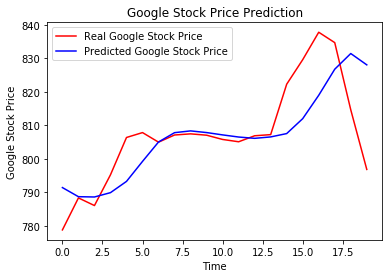

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()